Create Data Frame for Unemployment Statistics, Quality of Life and Cost of Living Statistics, and US City stats

In [ ]:
import pandas as pd
import ast

#Unemployment Rate
unemployment_df = pd.read_csv('city_unemployment_rate.csv')
unemployment_df_sorted = unemployment_df.sort_values(by='Unemployment Rate',ascending=False)

#Labor Force per City
labor_df = pd.read_csv('city_labor_force_population.csv')
labor_df = labor_df.sort_values(by='Labor Force Population',ascending=False)

#Quality of Life Ratings
quality_life_df = pd.read_csv('quality_of_life.csv')

#Cost of Living statistics
cost_living_df = pd.read_csv('cost_of_living.csv')

#US Cities
cities_df = pd.read_csv('uscities.csv')
city_density_df = cities_df.sort_values(by='density',ascending=False)
city_population_df = cities_df.sort_values(by='population',ascending=False)

# Function to safely convert string to tuple, used for analysis below
def str_to_tuple(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return None

# Example tables to display for final report
print(cost_living_df[['City','Water (1.5 liter bottle)','Cappuccino (regular)']].head())
print(quality_life_df[['City','Purchasing Power Index','Cost of Living Index']].head())
print(unemployment_df[['City','Unemployment Rate','State Abbreviation']].head())
print(labor_df[['City','Labor Force Population']].head())


In [ ]:
# Display cities with highest purchasing power and quality of life index

#Function to extract the float value from the csv file
def extract_value(val):
    t = str_to_tuple(val)
    if t and t[0] != '?':
        try:
            index_value = float(t[0])
            return index_value
        except:
            return None
    else:
        return None

#Sort the quality of life dataset by purchase power index, starting with the highest
df_purchase_power = quality_life_df.sort_values(
    by= 'Purchasing Power Index',
    key= lambda col: col.map(extract_value),
    ascending= False,
    na_position='last'
)

#Table of cities with highest purhcase power
df_purchase_power = df_purchase_power.drop_duplicates(subset=['City'], keep='first')
df_purchase_power.head(15)

Compare Monthly Apartment Prices of the Top populated US Cities

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'San Francisco'),
  Text(1, 0, 'Seattle'),
  Text(2, 0, 'Washington'),
  Text(3, 0, 'Boston'),
  Text(4, 0, 'San Diego'),
  Text(5, 0, 'Atlanta'),
  Text(6, 0, 'New York'),
  Text(7, 0, 'Chicago'),
  Text(8, 0, 'Dallas'),
  Text(9, 0, 'Los Angeles'),
  Text(10, 0, 'Houston'),
  Text(11, 0, 'Phoenix'),
  Text(12, 0, 'Philadelphia'),
  Text(13, 0, 'Miami'),
  Text(14, 0, 'Detroit')])

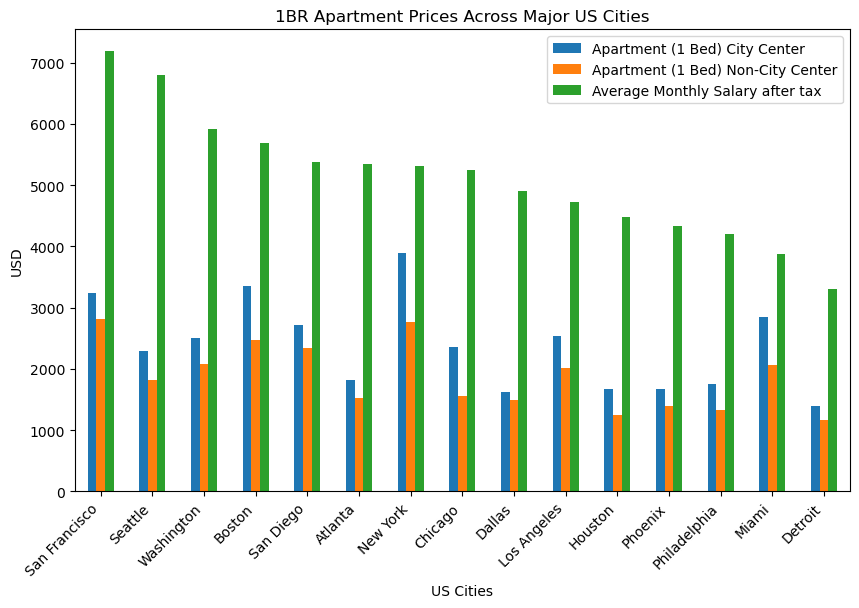

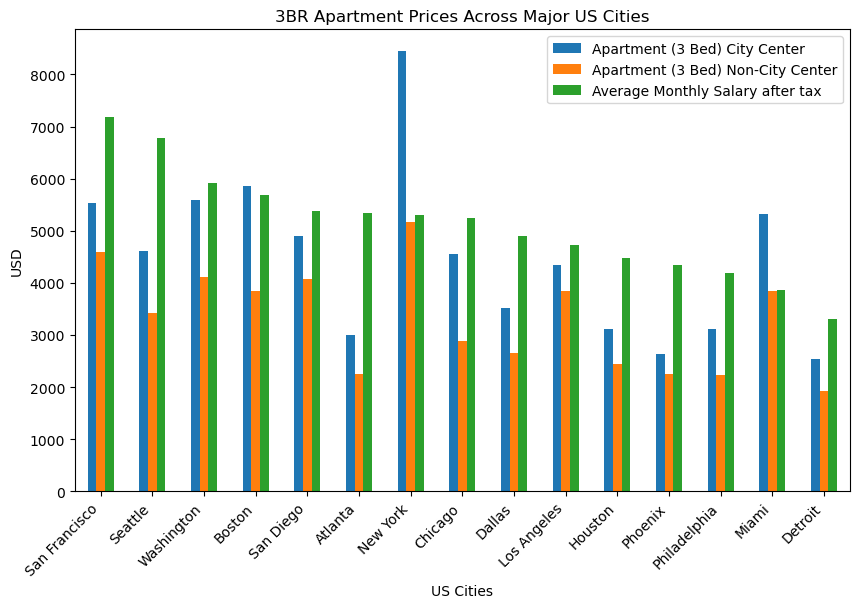

In [499]:
import ast
import matplotlib.pyplot as plt # for additional customization

#Build a table of the 10 most populated cities and rank the cost of a 1 Bedroom apartment in the city center
cities = city_population_df[0:15]
cities_cost = dict()

for index,row in cities.iterrows():
    try:
        city = row.values[1].strip()
        city_costs= cost_living_df.loc[cost_living_df['City'] == city]
        avg_1BR_citycenter = str_to_tuple(city_costs['Apartment (1 bedroom) in City Centre'].values[0])[0]
        avg_3BR_citycenter = str_to_tuple(city_costs['Apartment (3 bedrooms) in City Centre'].values[0])[0]
        avg_1BR_non_citycenter = str_to_tuple(city_costs['Apartment (1 bedroom) Outside of Centre'].values[0])[0]
        avg_3BR_non_citycenter = str_to_tuple(city_costs['Apartment (3 bedrooms) Outside of Centre'].values[0])[0]

        #avg_meal = str_to_tuple(city_costs["Meal, Inexpensive Restaurant"].values[0])[0]
        avg_salary = str_to_tuple(city_costs['Average Monthly Net Salary (After Tax)'].values[0])[0]
        cities_cost[city] = [avg_1BR_citycenter, avg_1BR_non_citycenter, avg_3BR_non_citycenter, avg_3BR_citycenter, avg_salary]
    except:
        pass

df = pd.DataFrame(cities_cost)
df.index = ['Apartment (1 Bed) City Center','Apartment (1 Bed) Non-City Center','Apartment (3 Bed) Non-City Center','Apartment (3 Bed) City Center','Average Monthly Salary after tax']
df = df.T
df = df.map(lambda x: float(str(x).replace(',', '')))
df1 = df.sort_values(by = 'Average Monthly Salary after tax',ascending=False)

#1 Bedroom Costs 
city_1BR_costs = df1[['Apartment (1 Bed) City Center','Apartment (1 Bed) Non-City Center','Average Monthly Salary after tax']]
# Plotting a bar graph for the 'Values' column
city_1BR_costs.plot(kind='bar',figsize=(10,6))
plt.title('1BR Apartment Prices Across Major US Cities')
plt.ylabel('USD')
plt.xlabel('US Cities')
plt.xticks(rotation=45, ha='right')

#3 Bedroom costs
city_3BR_costs = df1[['Apartment (3 Bed) City Center','Apartment (3 Bed) Non-City Center','Average Monthly Salary after tax']]

# Plotting a bar graph for the 'Values' column
city_3BR_costs.plot(kind='bar',figsize=(10,6))
plt.title('3BR Apartment Prices Across Major US Cities')
plt.ylabel('USD')
plt.xlabel('US Cities')
plt.xticks(rotation=45, ha='right')



Summarysd

In [504]:
#Summary Stats for US City Apartment Prices
df1.describe()

#use summary stats to determine on average how much more a 3 bedroom apartment costs than a 1 bedroom apartment
x = df1['Apartment (1 Bed) City Center'].mean() / df1['Apartment (1 Bed) Non-City Center'].mean() * 100 - 100
print(f'On average, 1 Bed Apartments are {round(x,1)}% more expensive in the city center than the non-city center')

x = df1['Apartment (3 Bed) City Center'].mean() / df1['Apartment (3 Bed) Non-City Center'].mean()*100 - 100
print(f'On average, 3 Bed Apartments are {round(x,1)}% more expensive in the city center than the non-city center')

x = df1['Apartment (3 Bed) City Center'].mean() / df1['Apartment (1 Bed) City Center'].mean()*100 -100
print(f'On average, 3 Bed Apartments are {round(x,1)}% more expensive than 1 Bed Apartments in the city center')

x = df1['Apartment (3 Bed) Non-City Center'].mean() / df1['Apartment (1 Bed) Non-City Center'].mean()*100 - 100
print(f'On average, 3 Bed Apartments are {round(x,1)}% more expensive than 1 Bed Apartments outside the city center')

On average, 1 Bed Apartments are 27.1% more expensive in the city center than the non-city center
On average, 3 Bed Apartments are 35.4% more expensive in the city center than the non-city center
On average, 3 Bed Apartments are 88.1% more expensive than 1 Bed Apartments in the city center
On average, 3 Bed Apartments are 76.6% more expensive than 1 Bed Apartments outside the city center


Determine if there is an obvious trend between Quality of Life VS Population of a city or Traffic/Commute vs Population

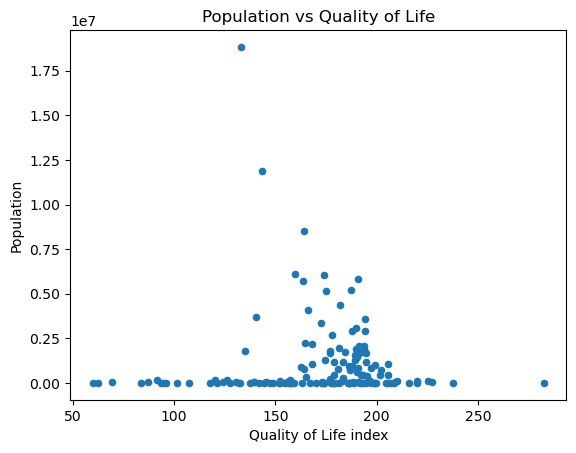

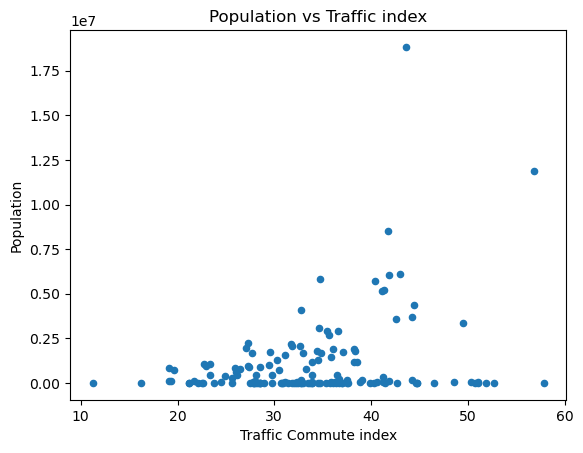

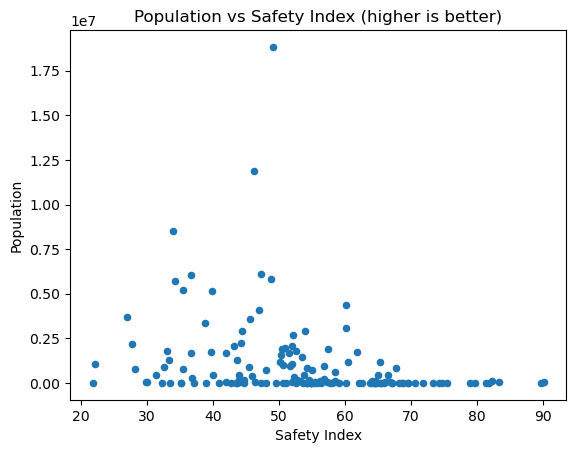

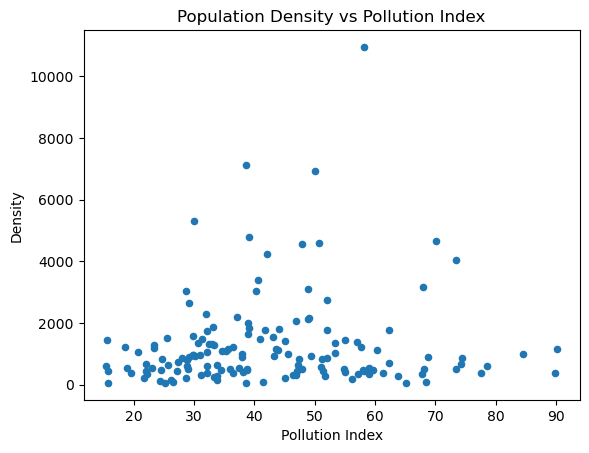

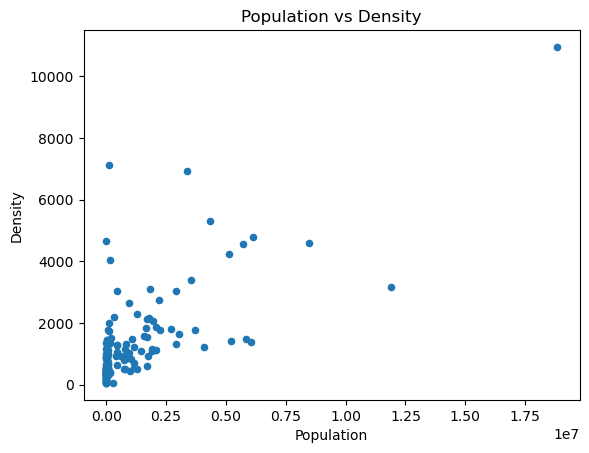

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Build a table of the most populated cities
cities = city_population_df
city_quality = []
cities_used = []

#Combine the uscities.csv with quality_of_life.csv to get population, density, and quality of life data into one table
for index,row in cities.iterrows():
    city = row['city']
    population = row['population']
    density = row['density']

    if city in cities_used:
        continue
    try:
        quality_life_data = quality_life_df[quality_life_df['City'] == city]
        quality_rating = float(str_to_tuple(quality_life_data['ƒQuality of Life Index:'].values[0])[0])
        traffic = float(str_to_tuple(quality_life_data['Traffic Commute Time Index'].values[0])[0])
        pollution = float(str_to_tuple(quality_life_data['Pollution Index'].values[0])[0])
        safety = float(str_to_tuple(quality_life_data['Safety Index'].values[0])[0])
        if quality_rating:
            city_quality.append((city, quality_rating, safety, traffic, pollution, population, density))
            cities_used.append(city)
    except:
        pass

#Create new data frame
df2= pd.DataFrame(city_quality,columns=['City','Quality of Life index', 'Safety Index','Traffic Commute index','Pollution Index','Population','Density'])

#Population vs Quality of Life index
df2.plot.scatter(x='Quality of Life index',y='Population')
plt.title('Population vs Quality of Life(higher)')
plt.show()

#Population vs Traffic/Commute index
df2.plot.scatter(x = 'Traffic Commute index', y = 'Population')
plt.title('Population vs Traffic index')
plt.show()

#Population vs Safety Index
df2.plot.scatter(x = 'Safety Index', y = 'Population')
plt.title('Population vs Safety Index (higher is better)')
plt.show()

#Density vs Pollution
df2.plot.scatter(x = 'Pollution Index', y = 'Density')
plt.title('Population Density vs Pollution Index')
plt.show()

#Density vs Population
df2.plot.scatter(x= 'Population', y='Density')
plt.title('Population vs Density')
plt.show()


In [ ]:
#Correlation
correlation = df2[['Quality of Life index','Traffic Commute index','Pollution Index','Population','Density','Safety Index']].corr()
print(correlation)


In [ ]:
import re

#Unemployment Rate and Labor Force Population Data
unemployment = []
unemployment_quality = []
cities_found = []

for index,row in labor_df.iterrows():
    population = row['Labor Force Population']
    city = row['City']
    state = row['State Abbreviation']
    try:
        data = unemployment_df[unemployment_df['City'] == city]
        unemployment_rate = data['Unemployment Rate'].values[0]
        unemployment.append((city,state,population,unemployment_rate))
    except:    
        pass

for city,state,population,unemployment_rate in unemployment:
    cities = city.split('-')
    pattern = r'\b(county|city|town|township|plantation|unorganized)\b'
    for city in cities:
        city = re.sub(pattern,'',city,flags=re.IGNORECASE)
        if city in cities_found:
            continue
        try:
            quality_life_data = quality_life_df[quality_life_df['City'] == city]
            quality_rating = float(str_to_tuple(quality_life_data['ƒQuality of Life Index:'].values[0])[0])
            unemployment_quality.append((city,state,population,unemployment_rate,quality_rating))

            cities_found.append(city)
        except:
            pass

df4 = pd.DataFrame(unemployment_quality, columns = ['City','State','Population','Unemployment Rate','Quality of Life Rating'])

#Population vs Quality of Life index
df4.plot.scatter(x='Unemployment Rate',y='Quality of Life Rating')
plt.title('Unemployment vs Quality of Life')
plt.show()

In [ ]:

df3 = pd.DataFrame(unemployment,columns = ['City','Population','Unemployment Rate'])
df3[['Population','Unemployment Rate']].corr()
df3.describe()
